In [1]:
content = sc.textFile("./AviationData.txt") \
            .map(lambda line: line.split(" | ")) \
            .filter(lambda array: array[5] == 'United States') \
            .map(lambda array: array[4]) \
            .map(lambda array: array.split(", ")) \
            .map(lambda array: (array[len(array)-1], 1)) \
            .reduceByKey(lambda a, b: a+b) \

spark_data = content.collect()
spark_data

[('AK', 5370),
 ('CO', 2578),
 ('TX', 5513),
 ('CA', 8513),
 ('WI', 1487),
 ('HI', 471),
 ('NC', 1543),
 ('MO', 1493),
 ('LA', 1141),
 ('NE', 683),
 ('KS', 1050),
 ('SD', 424),
 ('ME', 481),
 ('NY', 1834),
 ('OH', 1729),
 ('CT', 480),
 ('TN', 1020),
 ('NM', 1307),
 ('VA', 1207),
 ('SC', 906),
 ('AR', 1453),
 ('WY', 704),
 ('', 29),
 ('WV', 381),
 ('DE', 109),
 ('PR', 104),
 ('MH', 1),
 ('RI', 155),
 ('PO', 12),
 ('DC', 43),
 ('UN', 3),
 ('MI', 1949),
 ('NV', 1161),
 ('MN', 1386),
 ('MS', 777),
 ('WA', 2493),
 ('IN', 1247),
 ('ID', 1323),
 ('AZ', 2684),
 ('PA', 1683),
 ('MT', 988),
 ('IL', 1979),
 ('UT', 1246),
 ('OR', 1664),
 ('OK', 1174),
 ('GA', 1889),
 ('FL', 5502),
 ('KY', 611),
 ('AL', 1093),
 ('MA', 934),
 ('IA', 777),
 ('NH', 349),
 ('ND', 538),
 ('AO', 12),
 ('NJ', 1129),
 ('GU', 17),
 ('VT', 233),
 ('MD', 765),
 ('MP', 4),
 ('GM', 64),
 ('VI', 14),
 ('ON', 1)]

In [2]:
import altair as alt
import pandas as pd
from vega_datasets import data

alt.renderers.enable('notebook')

accidents_data = [ [d[0], d[1]] for d in spark_data ]

accidents_data = pd.DataFrame(accidents_data, columns=['state','accidents'])

In [3]:
ids = pd.read_csv('us-state-names.tsv', sep='\t')

final_data = accidents_data.merge(ids, left_on='state', right_on='code')
final_data

,state,accidents,id,code,name
0,AK,5370,2,AK,Alaska
1,CO,2578,8,CO,Colorado
2,TX,5513,48,TX,Texas
3,CA,8513,6,CA,California
4,WI,1487,55,WI,Wisconsin
5,HI,471,15,HI,Hawaii
6,NC,1543,37,NC,North Carolina
7,MO,1493,29,MO,Missouri
8,LA,1141,22,LA,Louisiana
9,NE,683,31,NE,Nebraska


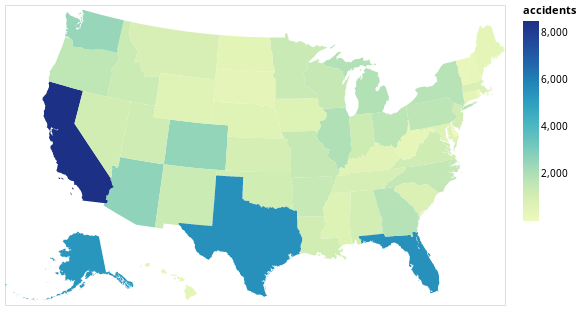

In [4]:
import altair as alt
from vega_datasets import data

alt.renderers.enable('notebook')

topomap = alt.topo_feature('https://raw.githubusercontent.com/vega/vega-datasets/master/data/us-10m.json', 'states')
source = data.unemployment.url

chart = alt.Chart(topomap).mark_geoshape().encode(
    color='accidents:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(final_data, 'id', ['accidents'])
).project(
    type='albersUsa'
).properties(
    width=500,
)
chart